In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the fully integrated dataset
df_master = pd.read_csv("master_dataset.csv")

(ChatGPT 5.2, 2025) Prompt: I have an unnamed column in my dataframe which is just the index, how can I remove it?

In [4]:
df_master.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
print(df_master.shape)
# Print data types BEFORE any cleaning
print("Data types BEFORE cleaning:\n")
print(df_master.dtypes)

# Also show a preview of the data for verification
print("\nPreview of df_master:\n")
df_master.head()

(1159966, 24)
Data types BEFORE cleaning:

transaction_id            int64
date                     object
client_id                 int64
card_id                   int64
amount                   object
use_chip                 object
merchant_id               int64
mcc                       int64
fraud                    object
card_brand               object
card_type                object
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
current_age               int64
gender                   object
per_capita_income        object
yearly_income            object
total_debt               object
credit_score              int64
num_credit_cards          int64
dtype: object

Preview of df_master:



,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,mcc,fraud,card_brand,...,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,22326462,2019-01-01 00:02:00,496,3186,$119.35,Chip Transaction,30286,4814,No,Visa,...,05/2016,2016,No,47,Male,$17810,$36319,$44737,730,4
1,22326465,2019-01-01 00:05:00,1129,2677,$100.00,Chip Transaction,27092,4829,No,Mastercard,...,04/2011,2011,No,49,Male,$16894,$34449,$36540,686,3
2,22326466,2019-01-01 00:06:00,114,5283,$51.71,Chip Transaction,61195,5541,No,Visa,...,10/2013,2013,No,47,Female,$16892,$34441,$907,725,4
3,22326467,2019-01-01 00:06:00,641,2774,$105.30,Swipe Transaction,75781,5411,No,Visa,...,04/2017,2017,No,62,Male,$18420,$37556,$0,735,6
4,22326468,2019-01-01 00:10:00,114,5283,$82.00,Chip Transaction,61195,5541,No,Visa,...,10/2013,2013,No,47,Female,$16892,$34441,$907,725,4


Handling missing data 

In [6]:
# Show missing values per column (sorted)
missing = df_master.isna().sum().sort_values(ascending=False)
print("Missing Values Per Column:\n")
print(missing)

Missing Values Per Column:

fraud                    382627
transaction_id                0
client_id                     0
date                          0
amount                        0
use_chip                      0
merchant_id                   0
card_id                       0
mcc                           0
card_brand                    0
card_type                     0
has_chip                      0
num_cards_issued              0
credit_limit                  0
acct_open_date                0
year_pin_last_changed         0
card_on_dark_web              0
current_age                   0
gender                        0
per_capita_income             0
yearly_income                 0
total_debt                    0
credit_score                  0
num_credit_cards              0
dtype: int64


In [7]:
df_master["fraud"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
#checking percentage of missing values in 'fraud' column
missing_fraud = df_master['fraud'].isna().mean() * 100
print(f"Percentage of missing fraud values: {missing_fraud:.2f}%")

Percentage of missing fraud values: 32.99%


In [10]:
#dropping nan rows
df_labeled = df_master.dropna(subset=["fraud"]).copy()

Checking for unique values

In [12]:
#checking for unique 
df_labeled.nunique()

transaction_id           777339
date                     315393
client_id                  1206
card_id                    3436
amount                    31398
use_chip                      3
merchant_id               24281
mcc                         109
fraud                         2
card_brand                    4
card_type                     3
has_chip                      2
num_cards_issued              3
credit_limit               2262
acct_open_date              293
year_pin_last_changed        19
card_on_dark_web              1
current_age                  74
gender                        2
per_capita_income          1109
yearly_income              1188
total_debt                 1137
credit_score                280
num_credit_cards              9
dtype: int64

Fixing data types 

In [13]:
df_labeled.dtypes

transaction_id            int64
date                     object
client_id                 int64
card_id                   int64
amount                   object
use_chip                 object
merchant_id               int64
mcc                       int64
fraud                    object
card_brand               object
card_type                object
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
current_age               int64
gender                   object
per_capita_income        object
yearly_income            object
total_debt               object
credit_score              int64
num_credit_cards          int64
dtype: object

In [14]:
money_cols = [
    "amount",
    "credit_limit",
    "per_capita_income",
    "yearly_income",
    "total_debt"
]

for col in money_cols:
    if col in df_labeled.columns:
        df_labeled[col] = (
            df_labeled[col]
            .astype(str)
            .str.replace(r"[\$,]", "", regex=True)
            .astype(float)
        )

print(df_labeled[money_cols].dtypes)

amount               float64
credit_limit         float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
dtype: object


In [15]:
df_labeled[money_cols].head()

,amount,credit_limit,per_capita_income,yearly_income,total_debt
0,119.35,22516.0,17810.0,36319.0,44737.0
1,100.00,7600.0,16894.0,34449.0,36540.0
2,51.71,10676.0,16892.0,34441.0,907.0
3,105.30,18401.0,18420.0,37556.0,0.0
4,82.00,10676.0,16892.0,34441.0,907.0


In [16]:
# Convert both dates to datetime format
df_labeled["date"] = pd.to_datetime(
    df_labeled["date"],
    errors="coerce"
)

df_labeled["acct_open_date"] = pd.to_datetime(
    df_labeled["acct_open_date"],
    errors="coerce"
)

C:\Users\ruqay\AppData\Local\Temp\ipykernel_41660\3522346643.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_labeled["acct_open_date"] = pd.to_datetime(


Feature Engineering

In [17]:
# Calculate age in days and years
mask_valid = df_labeled["date"].notna() & df_labeled["acct_open_date"].notna()
df_labeled.loc[mask_valid, "account_age_days"] = (
    df_labeled.loc[mask_valid, "date"] - df_labeled.loc[mask_valid, "acct_open_date"]
).dt.days

df_labeled["account_age_years"] = df_labeled["account_age_days"] / 365.25

df_labeled = df_labeled[df_labeled["account_age_days"] >= 0].copy()

df_labeled.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,mcc,fraud,card_brand,...,card_on_dark_web,current_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,account_age_days,account_age_years
0,22326462,2019-01-01 00:02:00,496,3186,119.35,Chip Transaction,30286,4814,No,Visa,...,No,47,Male,17810.0,36319.0,44737.0,730,4,975.0,2.669405
1,22326465,2019-01-01 00:05:00,1129,2677,100.00,Chip Transaction,27092,4829,No,Mastercard,...,No,49,Male,16894.0,34449.0,36540.0,686,3,2832.0,7.753593
2,22326466,2019-01-01 00:06:00,114,5283,51.71,Chip Transaction,61195,5541,No,Visa,...,No,47,Female,16892.0,34441.0,907.0,725,4,1918.0,5.251198
3,22326467,2019-01-01 00:06:00,641,2774,105.30,Swipe Transaction,75781,5411,No,Visa,...,No,62,Male,18420.0,37556.0,0.0,735,6,640.0,1.752225
4,22326468,2019-01-01 00:10:00,114,5283,82.00,Chip Transaction,61195,5541,No,Visa,...,No,47,Female,16892.0,34441.0,907.0,725,4,1918.0,5.251198


Encoding convert categorical columns to numeric (0/1)

(ChatGPT 5.2, 2025) Prompt: I want to encode categorical features (yes/no) to (1/0) give me the code.

In [18]:
df_labeled["fraud"] = (
    df_labeled["fraud"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)

In [19]:
# Convert card_on_dark_web
df_labeled["card_on_dark_web"] = (
    df_labeled["card_on_dark_web"]
    .astype(str).str.strip().str.capitalize()
    .map({"Yes": 1, "No": 0})
)


In [20]:
# convert has_chip:
df_labeled["has_chip"] = (
    df_labeled["has_chip"]
        .astype(str)
        .str.strip()
        .str.upper()
        .map({"NO": 0, "YES": 1})
        .astype("int64")
)

In [21]:
# gender: "Male"/"Female" 0/1 
df_labeled["gender"] = (
    df_labeled["gender"]
        .astype(str)
        .str.strip()
        .str.capitalize()
        .map({"Male": 0, "Female": 1})
        .astype("int64")
)


In [22]:
# card_brand (4 values) and card_type (3 values)
df_labeled = pd.get_dummies(
    df_labeled,
    columns=["card_brand", "card_type"],
    drop_first=True
)

# Convert all bool columns to int
df_labeled = df_labeled.astype({col: "int64" for col in df_labeled.select_dtypes(bool).columns})

Prompt: use_chip has 3 main categories, how would I be able to encode that (make it numeric) in python code? 

In [23]:
df_labeled["use_chip"] = (
    df_labeled["use_chip"]
        .astype("string")
        .str.strip()
        .str.replace(r"\s+", " ", regex=True) 
        .str.lower()
        .map({
            "online transaction": 2,
            "chip transaction":   1,
            "swipe transaction":  0,
        })
)

In [24]:
#checking for unique 
df_labeled.nunique()

transaction_id               777336
date                         315392
client_id                      1206
card_id                        3436
amount                        31395
use_chip                          3
merchant_id                   24281
mcc                             109
fraud                             2
has_chip                          2
num_cards_issued                  3
credit_limit                   2262
acct_open_date                  293
year_pin_last_changed            19
card_on_dark_web                  1
current_age                      74
gender                            2
per_capita_income              1109
yearly_income                  1188
total_debt                     1137
credit_score                    280
num_credit_cards                  9
account_age_days              10052
account_age_years             10052
card_brand_Discover               2
card_brand_Mastercard             2
card_brand_Visa                   2
card_type_Debit             

In [25]:
df_labeled.dtypes

transaction_id                        int64
date                         datetime64[ns]
client_id                             int64
card_id                               int64
amount                              float64
use_chip                              int64
merchant_id                           int64
mcc                                   int64
fraud                                 int64
has_chip                              int64
num_cards_issued                      int64
credit_limit                        float64
acct_open_date               datetime64[ns]
year_pin_last_changed                 int64
card_on_dark_web                      int64
current_age                           int64
gender                                int64
per_capita_income                   float64
yearly_income                       float64
total_debt                          float64
credit_score                          int64
num_credit_cards                      int64
account_age_days                

Outlier Detection & Treatment 

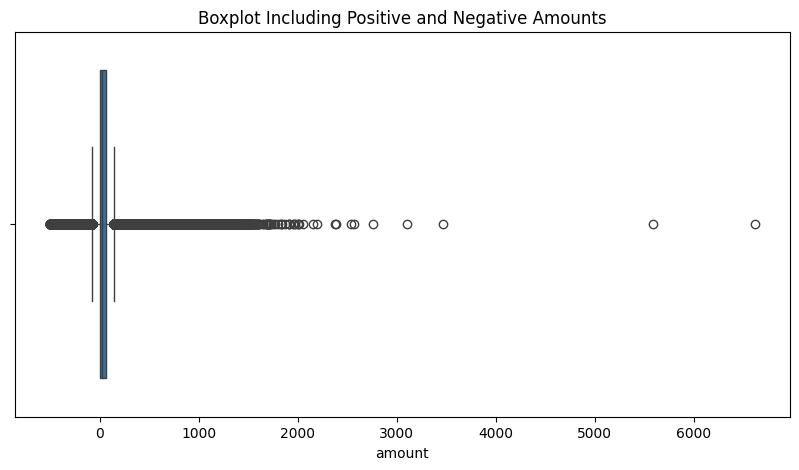

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_labeled["amount"])
plt.title("Boxplot Including Positive and Negative Amounts")
plt.show()


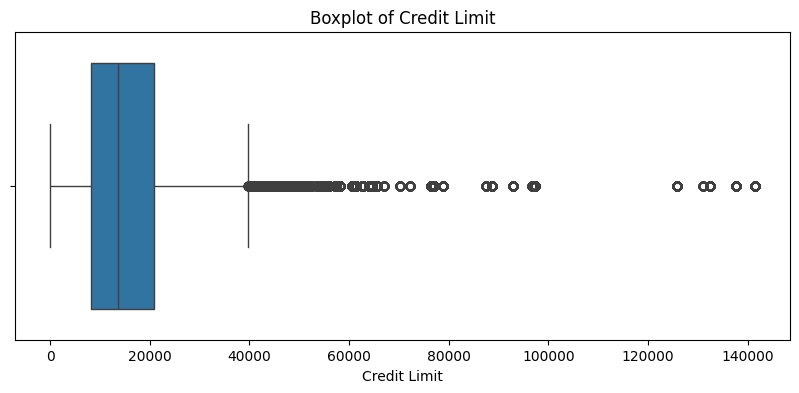

In [27]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_labeled["credit_limit"])
plt.title("Boxplot of Credit Limit")
plt.xlabel("Credit Limit")
plt.show()


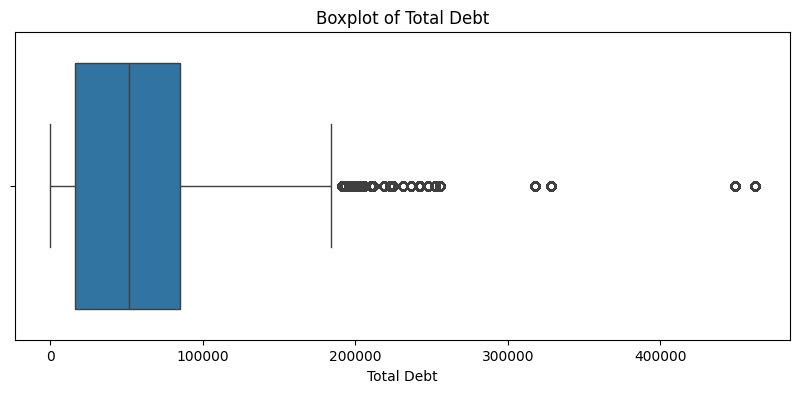

In [28]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_labeled["total_debt"])
plt.title("Boxplot of Total Debt")
plt.xlabel("Total Debt")
plt.show()


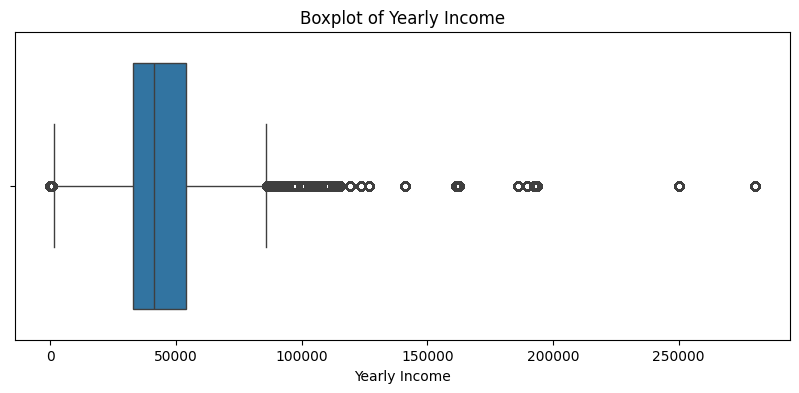

In [29]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_labeled["yearly_income"])
plt.title("Boxplot of Yearly Income")
plt.xlabel("Yearly Income")
plt.show()


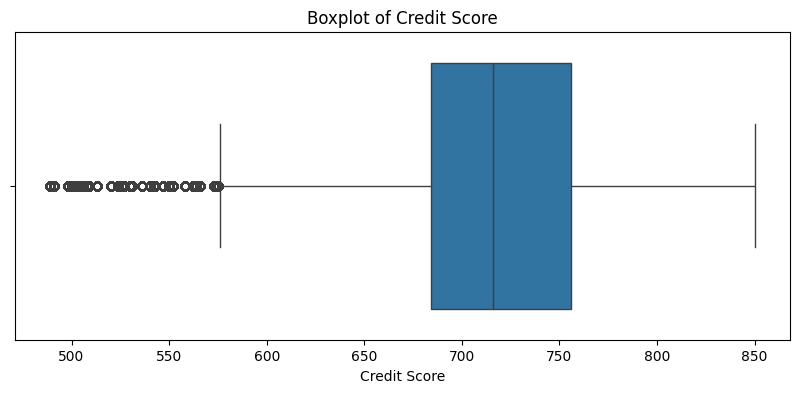

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_labeled["credit_score"])
plt.title("Boxplot of Credit Score")
plt.xlabel("Credit Score")
plt.show()


In [31]:
numeric_cols = [
    "amount", 
    "credit_limit", 
    "total_debt", 
    "yearly_income", 
    "credit_score"
]

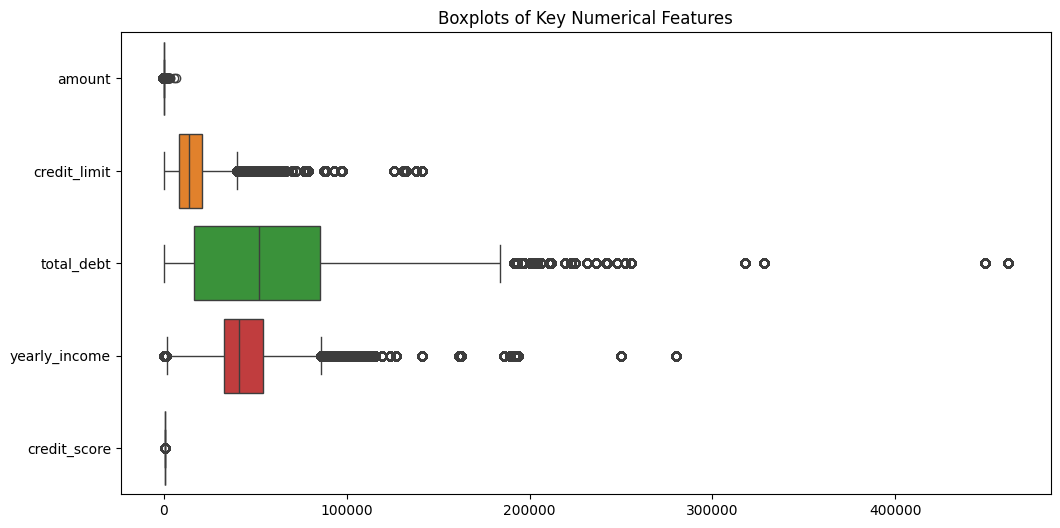

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_labeled[numeric_cols], orient="h")
plt.title("Boxplots of Key Numerical Features")
plt.show()


In [33]:
Q1 = df_labeled[numeric_cols].quantile(0.25)
Q3 = df_labeled[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [34]:
print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

Q1:
 amount               8.86
credit_limit      8200.00
total_debt       16549.00
yearly_income    32896.00
credit_score       684.00
Name: 0.25, dtype: float64

Q3:
 amount              63.08
credit_limit     20847.00
total_debt       85218.00
yearly_income    54122.00
credit_score       756.00
Name: 0.75, dtype: float64

IQR:
 amount              54.22
credit_limit     12647.00
total_debt       68669.00
yearly_income    21226.00
credit_score        72.00
dtype: float64


In [35]:
outliers_iqr = (
    (df_labeled[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df_labeled[numeric_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)


In [36]:
df_labeled["outlier_iqr"] = outliers_iqr

In [37]:
print("Number of IQR outliers:", df_labeled["outlier_iqr"].sum())
print("Percentage of outliers:", (df_labeled["outlier_iqr"].mean() * 100), "%")

Number of IQR outliers: 134223
Percentage of outliers: 17.26705054185063 %


In [38]:
df_labeled["outlier_iqr"] = (
    df_labeled["outlier_iqr"]
    .astype(str).str.strip().str.capitalize()
    .map({"True": 1, "False": 0})
)

In [39]:
scaler = MinMaxScaler()

df_labeled[["amount_norm", "credit_limit_norm", "total_debt_norm", "yearly_income_norm", "credit_score_norm"]] = scaler.fit_transform(
    df_labeled[["amount", "credit_limit", "total_debt", "yearly_income", "credit_score"]]
)

In [40]:
numeric_cols_norm = [
    "amount_norm", 
    "credit_limit_norm", 
    "total_debt_norm", 
    "yearly_income_norm", 
    "credit_score_norm"
]

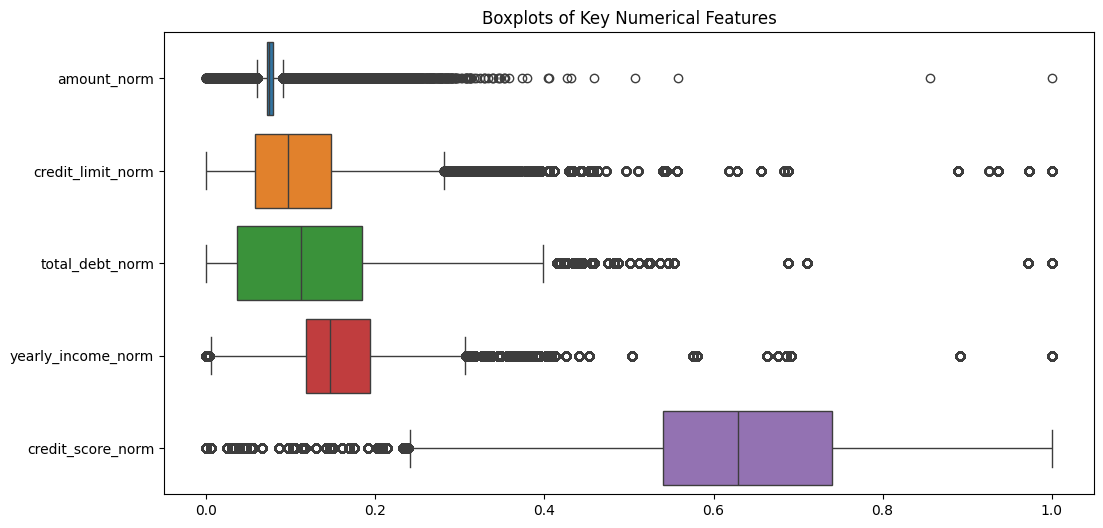

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_labeled[numeric_cols_norm], orient="h")
plt.title("Boxplots of Key Numerical Features")
plt.show()


In [42]:
df_labeled.head(10)

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,mcc,fraud,has_chip,...,card_brand_Mastercard,card_brand_Visa,card_type_Debit,card_type_Debit (Prepaid),outlier_iqr,amount_norm,credit_limit_norm,total_debt_norm,yearly_income_norm,credit_score_norm
0,22326462,2019-01-01 00:02:00,496,3186,119.35,1,30286,4814,0,1,...,0,1,1,0,0,0.087068,0.159246,0.096864,0.129615,0.667590
1,22326465,2019-01-01 00:05:00,1129,2677,100.00,1,27092,4829,0,1,...,1,0,0,0,0,0.084347,0.053752,0.079116,0.122942,0.545706
2,22326466,2019-01-01 00:06:00,114,5283,51.71,1,61195,5541,0,1,...,0,1,1,0,0,0.077559,0.075507,0.001964,0.122913,0.653740
3,22326467,2019-01-01 00:06:00,641,2774,105.30,0,75781,5411,0,1,...,0,1,1,0,0,0.085092,0.130143,0.000000,0.134030,0.681440
4,22326468,2019-01-01 00:10:00,114,5283,82.00,1,61195,5541,0,1,...,0,1,1,0,0,0.081817,0.075507,0.001964,0.122913,0.653740
6,22326470,2019-01-01 00:11:00,605,5061,3.55,1,59935,5499,0,1,...,0,1,1,0,0,0.070789,0.010496,0.005775,0.169669,0.653740
7,22326471,2019-01-01 00:11:00,1842,3743,8.87,1,17726,4900,0,1,...,0,1,1,0,0,0.071536,0.034069,0.126622,0.111964,0.409972
8,22326472,2019-01-01 00:13:00,1919,4302,48.12,1,69972,5814,0,1,...,0,1,1,0,0,0.077054,0.179962,0.004389,0.287268,0.335180
10,22326474,2019-01-01 00:14:00,1963,3364,20.75,1,25759,5812,0,1,...,0,1,1,0,0,0.073206,0.130022,0.000801,0.120872,0.919668
13,22326478,2019-01-01 00:19:00,1053,2900,167.39,2,17976,4900,0,1,...,1,0,0,0,1,0.093821,0.065068,0.202358,0.198324,0.407202


prompt: give me the code to check the cardinality and each unique value of every column in df_labeled

In [43]:
for col in df_labeled.columns:
    print(f"\nColumn: {col}")
    print(f"Cardinality: {df_labeled[col].nunique(dropna=False)}")
    print("Unique values:")
    print(df_labeled[col].unique())



Column: transaction_id
Cardinality: 777336
Unique values:
[22326462 22326465 22326466 ... 23761868 23761869 23761870]

Column: date
Cardinality: 315392
Unique values:
<DatetimeArray>
['2019-01-01 00:02:00', '2019-01-01 00:05:00', '2019-01-01 00:06:00',
 '2019-01-01 00:10:00', '2019-01-01 00:11:00', '2019-01-01 00:13:00',
 '2019-01-01 00:14:00', '2019-01-01 00:19:00', '2019-01-01 00:23:00',
 '2019-01-01 00:26:00',
 ...
 '2019-10-31 23:36:00', '2019-10-31 23:39:00', '2019-10-31 23:45:00',
 '2019-10-31 23:46:00', '2019-10-31 23:49:00', '2019-10-31 23:51:00',
 '2019-10-31 23:52:00', '2019-10-31 23:54:00', '2019-10-31 23:56:00',
 '2019-10-31 23:57:00']
Length: 315392, dtype: datetime64[ns]

Column: client_id
Cardinality: 1206
Unique values:
[ 496 1129  114 ...  240 1981 1740]

Column: card_id
Cardinality: 3436
Unique values:
[3186 2677 5283 ... 5342 5345 5336]

Column: amount
Cardinality: 31395
Unique values:
[119.35 100.    51.71 ... 397.54 693.96 694.3 ]

Column: use_chip
Cardinality: 3


In [44]:
df_labeled = df_labeled.drop(columns=["date", "acct_open_date", "amount", "credit_limit", "total_debt", "yearly_income", "credit_score"])

Prompt - i want to check the imbalance of the fraud column in df_labeled and generate a bar plot showing the distribution.

Class counts:
fraud
0    775976
1      1360
Name: count, dtype: int64

Class percentages:
fraud
0    99.825043
1     0.174957
Name: proportion, dtype: float64


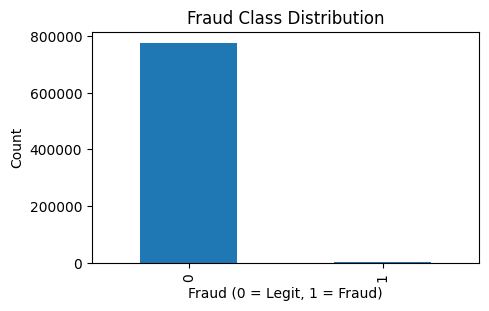

In [45]:
# 1. Make sure fraud is encoded as 0/1
df_labeled['fraud'] = df_labeled['fraud'].astype(int)

# 2. Count raw number of fraud vs non-fraud
print("Class counts:")
print(df_labeled['fraud'].value_counts())

# 3. Percentage distribution
print("\nClass percentages:")
print(df_labeled['fraud'].value_counts(normalize=True) * 100)

# 4. Optional: Plot imbalance
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
df_labeled['fraud'].value_counts().plot(kind='bar')
plt.title('Fraud Class Distribution')
plt.xlabel('Fraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


In [46]:
df_labeled.to_csv("cleaned_dataset.csv", index=False)